# Analysis of data

In [5]:
import pandas as pd
import glob
import os

In [6]:
csvfiles = glob.glob("data/raw_data/*.csv")
sample_df = pd.read_csv(csvfiles[0])

## Check data

In [7]:
sample_df

,patient,lobe,level,pos_x,pos_y,pos_z,up_x,up_y,up_z,shift_x,...,qw,qx,qy,qz,qw_base,qx_base,qy_base,qz_base,filename,base_filename
0,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.2700,-148.428,245.401,-0.188486,0.958053,-0.215888,0.000000,...,23.4623,0.598519,-0.701887,-0.386173,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
1,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.1080,-148.669,245.358,-0.644741,0.470145,0.602721,0.162485,...,70.0332,0.030616,-0.322843,-0.945957,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_1.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
2,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-107.0580,-148.638,245.539,-0.243238,-0.619865,0.746058,-0.787266,...,203.7990,0.053513,0.135498,0.989331,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_2.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
3,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-105.5390,-148.784,246.107,-0.565879,-0.494427,-0.659791,0.731860,...,221.0870,0.127442,0.160809,0.978723,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_3.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
4,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.2960,-148.656,244.739,-0.435014,-0.780146,-0.449594,-0.025930,...,202.2430,0.118145,0.157753,0.980386,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_4.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,LENS_P18_14_01_2016_INSP_CPAP,ur,3,-74.6211,-161.852,191.646,-0.995523,0.090814,0.026213,0.783866,...,134.0040,0.624477,-0.491319,-0.607152,102.7710,0.759046,0.615825,0.211205,LENS_P18_14_01_2016_INSP_CPAP_ur_3_1035_36.png,LENS_P18_14_01_2016_INSP_CPAP_ur_3_1035_0.png
652,LENS_P18_14_01_2016_INSP_CPAP,ur,3,-74.9223,-161.584,191.526,-0.524591,0.181249,0.831838,0.482678,...,185.9390,-0.285642,0.679002,0.676288,102.7710,0.759046,0.615825,0.211205,LENS_P18_14_01_2016_INSP_CPAP_ur_3_1035_37.png,LENS_P18_14_01_2016_INSP_CPAP_ur_3_1035_0.png
653,LENS_P18_14_01_2016_INSP_CPAP,ur,3,-74.6038,-162.926,190.680,-0.661498,-0.625973,-0.413011,0.801123,...,122.8780,0.838418,-0.306483,-0.450692,102.7710,0.759046,0.615825,0.211205,LENS_P18_14_01_2016_INSP_CPAP_ur_3_1035_38.png,LENS_P18_14_01_2016_INSP_CPAP_ur_3_1035_0.png
654,LENS_P18_14_01_2016_INSP_CPAP,ur,3,-75.6497,-163.122,190.639,-0.539012,0.117558,-0.834054,-0.244744,...,114.2860,0.932339,-0.006709,-0.361522,102.7710,0.759046,0.615825,0.211205,LENS_P18_14_01_2016_INSP_CPAP_ur_3_1035_39.png,LENS_P18_14_01_2016_INSP_CPAP_ur_3_1035_0.png


In [8]:
sample_df[(sample_df["lobe"]=="bl") & (sample_df["level"]==0)]

,patient,lobe,level,pos_x,pos_y,pos_z,up_x,up_y,up_z,shift_x,...,qw,qx,qy,qz,qw_base,qx_base,qy_base,qz_base,filename,base_filename
0,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.270,-148.428,245.401,-0.188486,0.958053,-0.215888,0.000000,...,23.4623,0.598519,-0.701887,-0.386173,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
1,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.108,-148.669,245.358,-0.644741,0.470145,0.602721,0.162485,...,70.0332,0.030616,-0.322843,-0.945957,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_1.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
2,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-107.058,-148.638,245.539,-0.243238,-0.619865,0.746058,-0.787266,...,203.7990,0.053513,0.135498,0.989331,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_2.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
3,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-105.539,-148.784,246.107,-0.565879,-0.494427,-0.659791,0.731860,...,221.0870,0.127442,0.160809,0.978723,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_3.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
4,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.296,-148.656,244.739,-0.435014,-0.780146,-0.449594,-0.025930,...,202.2430,0.118145,0.157753,0.980386,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_4.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
5,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.502,-149.426,246.202,-0.572544,-0.304492,-0.761235,-0.231289,...,241.8530,0.071746,0.124389,0.989636,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_5.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
6,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-105.452,-148.687,244.956,0.094521,0.674031,0.732631,0.818635,...,36.2751,0.238191,-0.697331,-0.676014,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_6.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
7,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-105.807,-149.282,244.542,-0.774909,-0.335144,-0.535905,0.463243,...,245.4760,0.129045,0.204977,0.970223,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_7.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
8,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.865,-147.797,245.991,-0.233596,0.348565,-0.907709,-0.594991,...,22.5868,0.797405,-0.489721,-0.352590,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_8.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
9,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-105.854,-147.649,244.725,0.074746,0.671233,-0.737468,0.415947,...,34.1872,0.741492,-0.473245,0.475636,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_9.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png


In [9]:
sample_df[(sample_df["lobe"]=="bl") & (sample_df["level"]==0)].iloc[:10, :]

,patient,lobe,level,pos_x,pos_y,pos_z,up_x,up_y,up_z,shift_x,...,qw,qx,qy,qz,qw_base,qx_base,qy_base,qz_base,filename,base_filename
0,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.270,-148.428,245.401,-0.188486,0.958053,-0.215888,0.000000,...,23.4623,0.598519,-0.701887,-0.386173,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
1,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.108,-148.669,245.358,-0.644741,0.470145,0.602721,0.162485,...,70.0332,0.030616,-0.322843,-0.945957,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_1.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
2,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-107.058,-148.638,245.539,-0.243238,-0.619865,0.746058,-0.787266,...,203.7990,0.053513,0.135498,0.989331,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_2.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
3,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-105.539,-148.784,246.107,-0.565879,-0.494427,-0.659791,0.731860,...,221.0870,0.127442,0.160809,0.978723,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_3.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
4,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.296,-148.656,244.739,-0.435014,-0.780146,-0.449594,-0.025930,...,202.2430,0.118145,0.157753,0.980386,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_4.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
5,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.502,-149.426,246.202,-0.572544,-0.304492,-0.761235,-0.231289,...,241.8530,0.071746,0.124389,0.989636,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_5.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
6,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-105.452,-148.687,244.956,0.094521,0.674031,0.732631,0.818635,...,36.2751,0.238191,-0.697331,-0.676014,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_6.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
7,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-105.807,-149.282,244.542,-0.774909,-0.335144,-0.535905,0.463243,...,245.4760,0.129045,0.204977,0.970223,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_7.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
8,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-106.865,-147.797,245.991,-0.233596,0.348565,-0.907709,-0.594991,...,22.5868,0.797405,-0.489721,-0.352590,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_8.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png
9,LENS_P18_14_01_2016_INSP_CPAP,bl,0,-105.854,-147.649,244.725,0.074746,0.671233,-0.737468,0.415947,...,34.1872,0.741492,-0.473245,0.475636,23.4623,0.598519,-0.701887,-0.386173,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_9.png,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_0.png


In [10]:
columns_use = ["patient", "shift_x", "shift_y", "shift_z", "qx", "qy", "qz", "filename"]

In [21]:
np.mean(np.stack([
    sample_df[(sample_df["lobe"]=="bl") & (sample_df["level"]==0)].loc[10:20, columns_use[1:-1]].sum().to_numpy(),
    sample_df[(sample_df["lobe"]=="bl") & (sample_df["level"]==0)].loc[10:20, columns_use[1:-1]].sum().to_numpy()
]), axis=0)


array([-0.2257088,  1.2124735, -1.7350384,  2.9584231, -0.6280826,
        6.478816 ])

## Element selection

In [9]:
sample_df[(sample_df["lobe"]=="bl") & (sample_df["level"]==0)].loc[10:20, columns_use].loc[]

,patient,shift_x,shift_y,shift_z,qx,qy,qz,filename
10,LENS_P18_14_01_2016_INSP_CPAP,-0.612920,0.292084,-0.888863,0.261537,-0.368665,-0.892012,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_10.png
11,LENS_P18_14_01_2016_INSP_CPAP,0.327921,-0.750071,-0.980127,0.112086,0.217208,0.969669,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_11.png
12,LENS_P18_14_01_2016_INSP_CPAP,0.468499,0.136575,-0.696721,0.447407,-0.196985,0.872367,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_12.png
13,LENS_P18_14_01_2016_INSP_CPAP,-0.194123,0.144246,0.608567,0.541058,-0.270739,0.796214,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_13.png
14,LENS_P18_14_01_2016_INSP_CPAP,-0.954713,0.479491,-0.588227,0.259292,-0.301207,-0.917628,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_14.png
15,LENS_P18_14_01_2016_INSP_CPAP,0.298810,0.674858,-0.524778,0.396096,-0.034182,0.917573,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_15.png
16,LENS_P18_14_01_2016_INSP_CPAP,0.300958,-0.068610,0.652117,0.380940,-0.193560,0.904112,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_16.png
17,LENS_P18_14_01_2016_INSP_CPAP,-0.776728,0.622076,0.386273,-0.067095,0.228447,0.971242,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_17.png
18,LENS_P18_14_01_2016_INSP_CPAP,0.229545,-0.704489,-0.400208,0.072315,0.235112,0.969274,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_18.png
19,LENS_P18_14_01_2016_INSP_CPAP,0.032208,0.495655,0.022154,0.411151,-0.080953,0.907965,LENS_P18_14_01_2016_INSP_CPAP_bl_0_578_19.png


In [1]:
from BronchoTrack.data import datasets
import matplotlib.pyplot as plt
import numpy as np

bronchoset = datasets.BronchoDataset("data/cleaned/train", "data/raw_data")

In [2]:
next(iter(bronchoset))["images"].shape

torch.Size([11, 3, 256, 256])

In [3]:
batch = next(iter(bronchoset))

In [4]:
batch["pos_labels"]

array([[ 0.70735786, -0.46839392, -1.27379576],
       [-1.69625253,  0.75446106, -0.11497993],
       [ 0.38979774,  0.63389509,  0.61053915],
       [-1.658497  , -1.04297302,  1.59249519],
       [-1.3036338 , -1.10059386,  0.25809039],
       [-1.50738928,  1.20360392, -0.73783759],
       [ 1.09845505, -1.02804263,  1.45987187],
       [ 0.44101655,  0.65526389, -0.87615476],
       [ 1.28215973, -0.05230555, -0.32273345],
       [-1.44515983, -1.18477333, -1.11058577],
       [ 1.09042984,  0.87933153,  1.3139138 ]])

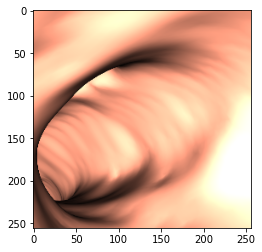

In [17]:
plt.imshow(np.round((np.transpose(batch["images"][0], (1, 2, 0))*bronchoset.image_std + bronchoset.image_mean)*255).numpy().astype(np.uint8))

## Distribution of data

In [19]:
del datasets